In [127]:
from oracles import QuadraticOracle
from methods import GradientDescent
from plot_trajectory_2d import plot_levels, plot_trajectory

import matplotlib.pyplot as plt
import numpy as np

## Траектория градиентного спуска на квадратичной функции

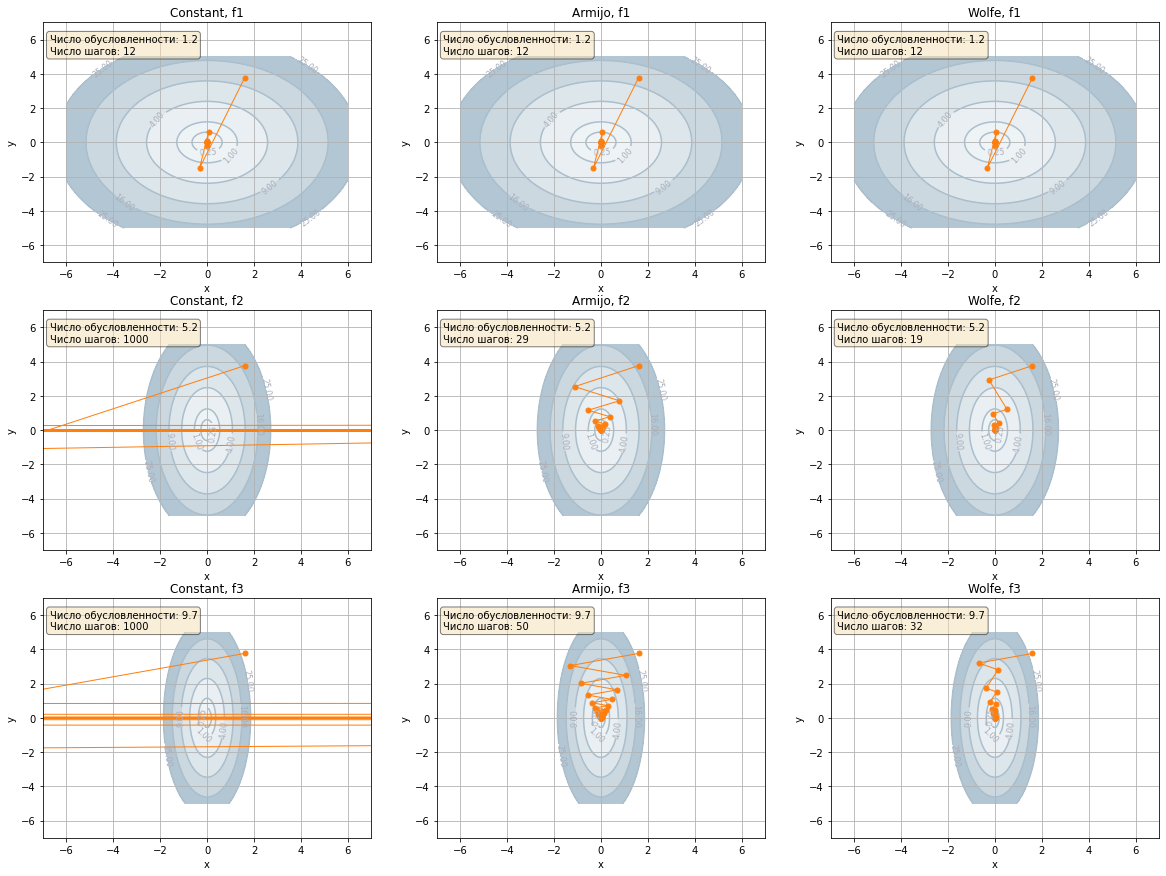

In [149]:
def plot_everything():
    A_list = [np.array([[1.2, 0], [0, 1.4]]), 
            np.array([[6.8, 0], [0, 1.3]]),
            np.array([[14.5, 0], [0, 1.5]])]
    b = np.zeros(2)
    methods = ['Constant', 'Armijo', 'Wolfe']
    x0 = np.random.random((2)) * 6
    fig, ax = plt.subplots(3, 3, figsize=(20, 15))

    for i, A in enumerate(A_list):
        for j, method in enumerate(methods):
            func = QuadraticOracle(A, b)
            grad_descent = GradientDescent(
                func, x0,
                tolerance=1e-9,
                line_search_options={
                    'method': method
                }
            )
            grad_descent.run(1000)
            plt.sca(ax[i][j])
            plot_levels(func.func)
            plot_trajectory(func.func, grad_descent.hist['x'], fit_axis=False)
            plt.title(f'{method}, f{i + 1}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.xlim(-7, 7)
            plt.ylim(-7, 7)
            num_iter = len(grad_descent.hist['func']) - 1
            textstr = '\n'.join((
                f'Число обусловленности: {np.linalg.cond(A).round(1)}',
                f'Число шагов: {num_iter}',
            ))
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax[i][j].text(0.02, 0.95, textstr, transform=ax[i][j].transAxes, fontsize=10,
                    verticalalignment='top', bbox=props)
            

plot_everything()

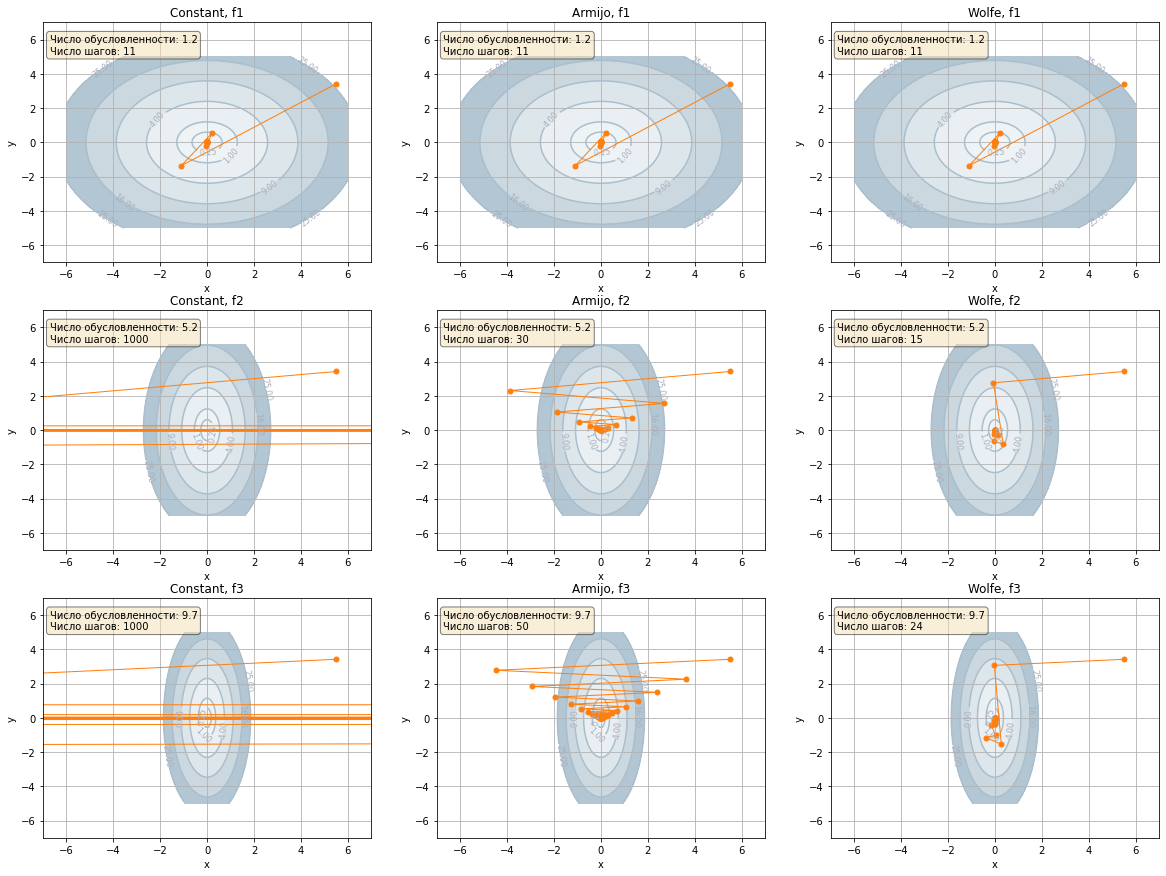

In [151]:
#  Другая начальная точка
plot_everything()

### Вывод
Проведенный эксперимент показывает, что метод Вульфа быстрее всех приводит к правильному ответу, опережая метод Армихо. Причем чем больше число обусловленности функции, тем это явнее видно. Константный метод хорошо работает только с функциями с маленькой обусловленностью. 

Можно заметить, что, если начальная точка достаточно далеко, то и норма антиградиента будет в начальной точке будет большой, соответственно критерий остановки наступит раньше, в случае начальной точки близкой к ответу.